В этом домашнем задании вам предстоит с помощью Pandas ответить на несколько вопросов об этом [датасете](https://archive.ics.uci.edu/ml/datasets/Adult). Все ответы вам предстоит отправить в этой [форме](https://forms.gle/qfVth9BygS4AVJZ47)

Чтобы начать надо сохранить этот ноутбук себе на диск (File - Save a copy in Drive) или скачать (File - Download), если вы делаете у себя локально.

Скачать нужный датасет можно [тут](https://disk.yandex.ru/d/6WlIXR-y_PObLg)

Эта домашняя работа легкая и покрывает лишь некоторую базу, очень советую пройтись по доп.материалам и посмотреть на различные крутые штуки, которые может делать Pandas, Matplotlib или Seaborn. Особенно если вы хотите заниматься анализом данных намного серьезнее.

Мягкий дедлайн: 31 октября 23:59 \
Жесткий дедлайн: 7 ноября 23:59

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (18, 10)

**Задание 0: Прочитайте скачанный датасет и выведите его**

In [ ]:
df = pd.read_csv('/content/adult_data.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Задание 1: Найдите количество мужчин и количество женщин в датасете**

In [ ]:
count_by_sex = df['sex'].value_counts()
print(count_by_sex)

sex
Male      21790
Female    10771
Name: count, dtype: int64


**Задание 2: Найдите средний возраст мужчин**

In [ ]:
mean_age_male = df[df['sex'] == 'Male']['age'].mean()
print(round(mean_age_male, 1))


39.4


**Задание 3: Найдите процент людей, которые являются гражданами Тайваня (Taiwan)**

In [ ]:
total_people = len(df)
taiwan_people = len(df[df['native-country'] == 'Taiwan'])
percentage = (taiwan_people / total_people) * 100
print(f"{percentage:.2f}%")

0.16%


**Задание 4: Найдите среднее значение возраста для людей, которые зарабатывают >50K**

In [ ]:
mean_age_high_income = df[df['salary'] == '>50K']['age'].mean()
print(round(mean_age_high_income, 1))

44.2


**Задание 5: Найдите стандартное отклонение возраста для людей, которые зарабатывают >50K**

In [ ]:
std_age_high_income = df[df['salary'] == '>50K']['age'].std()
print(round(std_age_high_income, 1))

10.5


**Задание 6: Проверьте, правда ли что все люди, которые зарабытвают >50K, имеют образование Bachelors+**

In [ ]:
high_income = df[df['salary'] == '>50K']
bachelors_plus = ['Bachelors', 'Masters', 'Doctorate', 'Prof-school']
all_high_education = high_income['education'].isin(bachelors_plus).all()

print(all_high_education)

False


**Задание 7: Сколько человек, работающих 40 часов и являющихся гражданами США (United-States), зарабатывают <=50K**

In [ ]:
filtered = df[(df['hours-per-week'] == 40) &
             (df['native-country'] == 'United-States') &
             (df['salary'] == '<=50K')]

count = len(filtered)
print(count)

10493


**Задание 8: Теперь чуть сложнее. Давайте найдем максимальное количество часов в неделю (hours-per-week), а потом посмотрим, сколько человек работают столько времени в неделю и зарабатывают <=50K**

In [ ]:
max_hours = df['hours-per-week'].max()
count = len(df[(df['hours-per-week'] == max_hours) & (df['salary'] == '<=50K')])
print(f"Максимальное количество часов: {max_hours}")
print(f"Количество людей: {count}")

Максимальное количество часов: 99
Количество людей: 60


**Задание 9: В этом задании вам предстоит построить ваш первый график. Ответьте на вопрос: людей с каким образованием больше всего представленно в датасете? \
P.S Использовать можно matplotlib, seaborn, plotly**

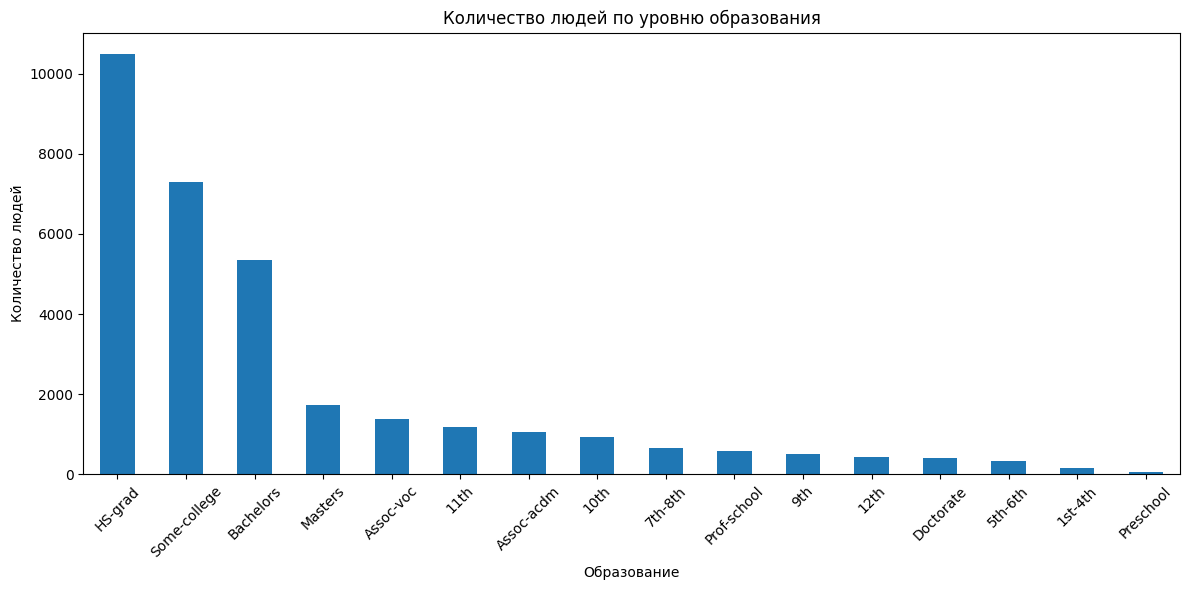

Самое распространенное образование: HS-grad


In [ ]:
education_counts = df['education'].value_counts()

# Строим график
plt.figure(figsize=(12, 6))
education_counts.plot(kind='bar')
plt.title('Количество людей по уровню образования')
plt.xlabel('Образование')
plt.ylabel('Количество людей')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Выводим самое частое образование
most_common_education = education_counts.index[0]
print(f"Самое распространенное образование: {most_common_education}")

**Задание 10: А теперь давайте посмотрим на распределение возрастов. Сколько возрастных отрезков имеют больше 1600 значений? (Одним "отрезков" является один столбец при стандартных настройках seaborn/matplotlib)
P.S. Необязательное задание, хотя лучше сделать, если собираетесь сдавать до мягкого, я хоты бы посмотрю**

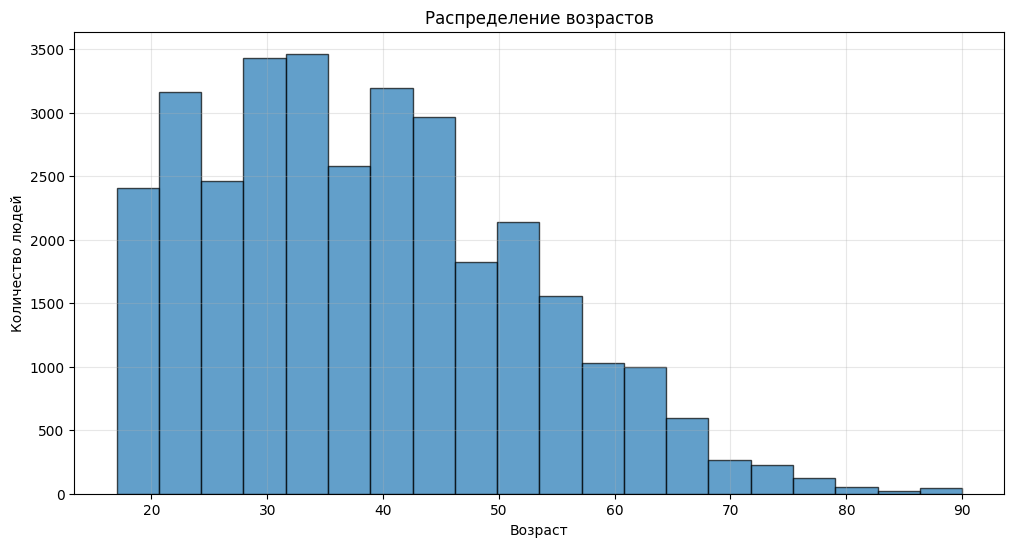

Количество возрастных отрезков с >1600 значений: 10


In [ ]:
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(df['age'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Распределение возрастов')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.grid(True, alpha=0.3)
plt.show()
count_above_1600 = sum(n > 1600)
print(f"Количество возрастных отрезков с >1600 значений: {count_above_1600}")
